## EDA 20200820 GS_CJ

## 목차

**GS**
* [각 상품에 대한 절대지수(?) 만들기](#GS데이터-각-상품에대한-매출액(?)구하기)
* [날짜별 매출지수 그래프](#날짜(YY-MM-DD)별-매출지수-그래프-그리기-(서울/대구))
    * [대구](#대구)
    * [서울](#서울)

**CJ**
* [월별 업종 배송상품 건수 그래프](#시별(서울/대구)-월별-배송상품건수-그래프)
    * [대구](#대구-그래프)
    * [서울](#서울-그래프)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import datetime as dt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
import pickle

with open('../BIGCON_DATA_ver1.2/CJ_DATA.bin', 'rb') as f:
    cj_data = pickle.load(f) 
with open('../BIGCON_DATA_ver1.2/GS_DATA.bin', 'rb') as f:
    gs_data = pickle.load(f) 

In [6]:
print(cj_data.keys())
print(gs_data.keys())

dict_keys(['CJ_DATA', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])
dict_keys(['GS_TOTAL', 'GS_CATEGORY', 'GS_DONG', 'ITEM_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])


In [115]:
# cj 데이터
cj = cj_data['CJ_DATA']
# gs 데이터 
gs = gs_data['GS_TOTAL']
# gs.head()

# GS Data

In [116]:
gs_copy = gs.copy()
gs_copy.head()

DATE  YEAR  MONTH  DAY SI_NM GU_NM DONG_NM  AMT_IND  LCLS_10_P  \
0 2019-02-01  2019      2    1    대구   수성구    고산1동     1.06      0.451   
1 2019-02-01  2019      2    1    대구   수성구    고산2동     1.08      0.458   
2 2019-02-01  2019      2    1    대구   수성구    고산3동     0.86      0.360   
3 2019-02-01  2019      2    1    대구   수성구     두산동     0.72      0.282   
4 2019-02-01  2019      2    1    대구   수성구    만촌1동     1.16      0.401   

   LCLS_20_P  LCLS_30_P  LCLS_40_P  LCLS_50_P  LCLS_60_P  LCLS_70_P  \
0      0.172      0.295      0.023      0.045      0.005      0.005   
1      0.196      0.296      0.006      0.034      0.001      0.009   
2      0.197      0.377      0.013      0.030      0.009      0.009   
3      0.175      0.363      0.024      0.134      0.000      0.021   
4      0.200      0.311      0.039      0.035      0.005      0.006   

   LCLS_80_P SI_CODE GU_CODE DONG_CODE TOTAL_CODE  
0      0.004      27      26       670    2726670  
1      0.001      27      26       680    2726680  
2      0.006      27      26       690    2726690  
3      0.000      27      26       640    2726640  
4      0.003      27      26       550    2726550

### GS데이터 각 상품에대한 매출액(?)구하기
* 매출지수(AMT_IND) X 상품별 비중(LCLS_10_P, LCLS_20_P, LCLS_30_P, LCLS_40_P, LCLS_50_P, LCLS_60_P, LCLS_70_P, LCLS_80_P) 

In [88]:
gs_copy.iloc[:, 8:16] = np.round(gs_copy.iloc[:, 8:16].mul(gs_copy['AMT_IND'], axis=0),2)
gs_copy.head()

DATE  YEAR  MONTH  DAY SI_NM GU_NM DONG_NM  AMT_IND  LCLS_10_P  \
0 2019-02-01  2019      2    1    대구   수성구    고산1동     1.06       0.48   
1 2019-02-01  2019      2    1    대구   수성구    고산2동     1.08       0.49   
2 2019-02-01  2019      2    1    대구   수성구    고산3동     0.86       0.31   
3 2019-02-01  2019      2    1    대구   수성구     두산동     0.72       0.20   
4 2019-02-01  2019      2    1    대구   수성구    만촌1동     1.16       0.47   

   LCLS_20_P  LCLS_30_P  LCLS_40_P  LCLS_50_P  LCLS_60_P  LCLS_70_P  \
0       0.18       0.31       0.02       0.05       0.01       0.01   
1       0.21       0.32       0.01       0.04       0.00       0.01   
2       0.17       0.32       0.01       0.03       0.01       0.01   
3       0.13       0.26       0.02       0.10       0.00       0.02   
4       0.23       0.36       0.05       0.04       0.01       0.01   

   LCLS_80_P SI_CODE GU_CODE DONG_CODE TOTAL_CODE  
0       0.00      27      26       670    2726670  
1       0.00      27      26       680    2726680  
2       0.01      27      26       690    2726690  
3       0.00      27      26       640    2726640  
4       0.00      27      26       550    2726550

### 날짜(YY-MM-DD)별 매출지수 그래프 그리기 (서울/대구)
단순 기준일인 신당5동보다 매출이 줄었는지 늘었는지 매출 추이를 파악하기 위함

In [55]:
# 전처리 datetime의 뒤에 HMS 떼기
gs_copy['DATE'] = [i.date() for i in gs_copy['DATE']]
gs_copy['DATE'] = gs_copy['DATE'].astype(str)

In [56]:
# 1. 서울 DataFrame로, 대구 DataFrame로 나누기

daegu_df = gs_copy[gs_copy['TOTAL_CODE'].str.startswith('27')]
seoul_df = gs_copy[gs_copy['TOTAL_CODE'].str.startswith('11')]

### 대구

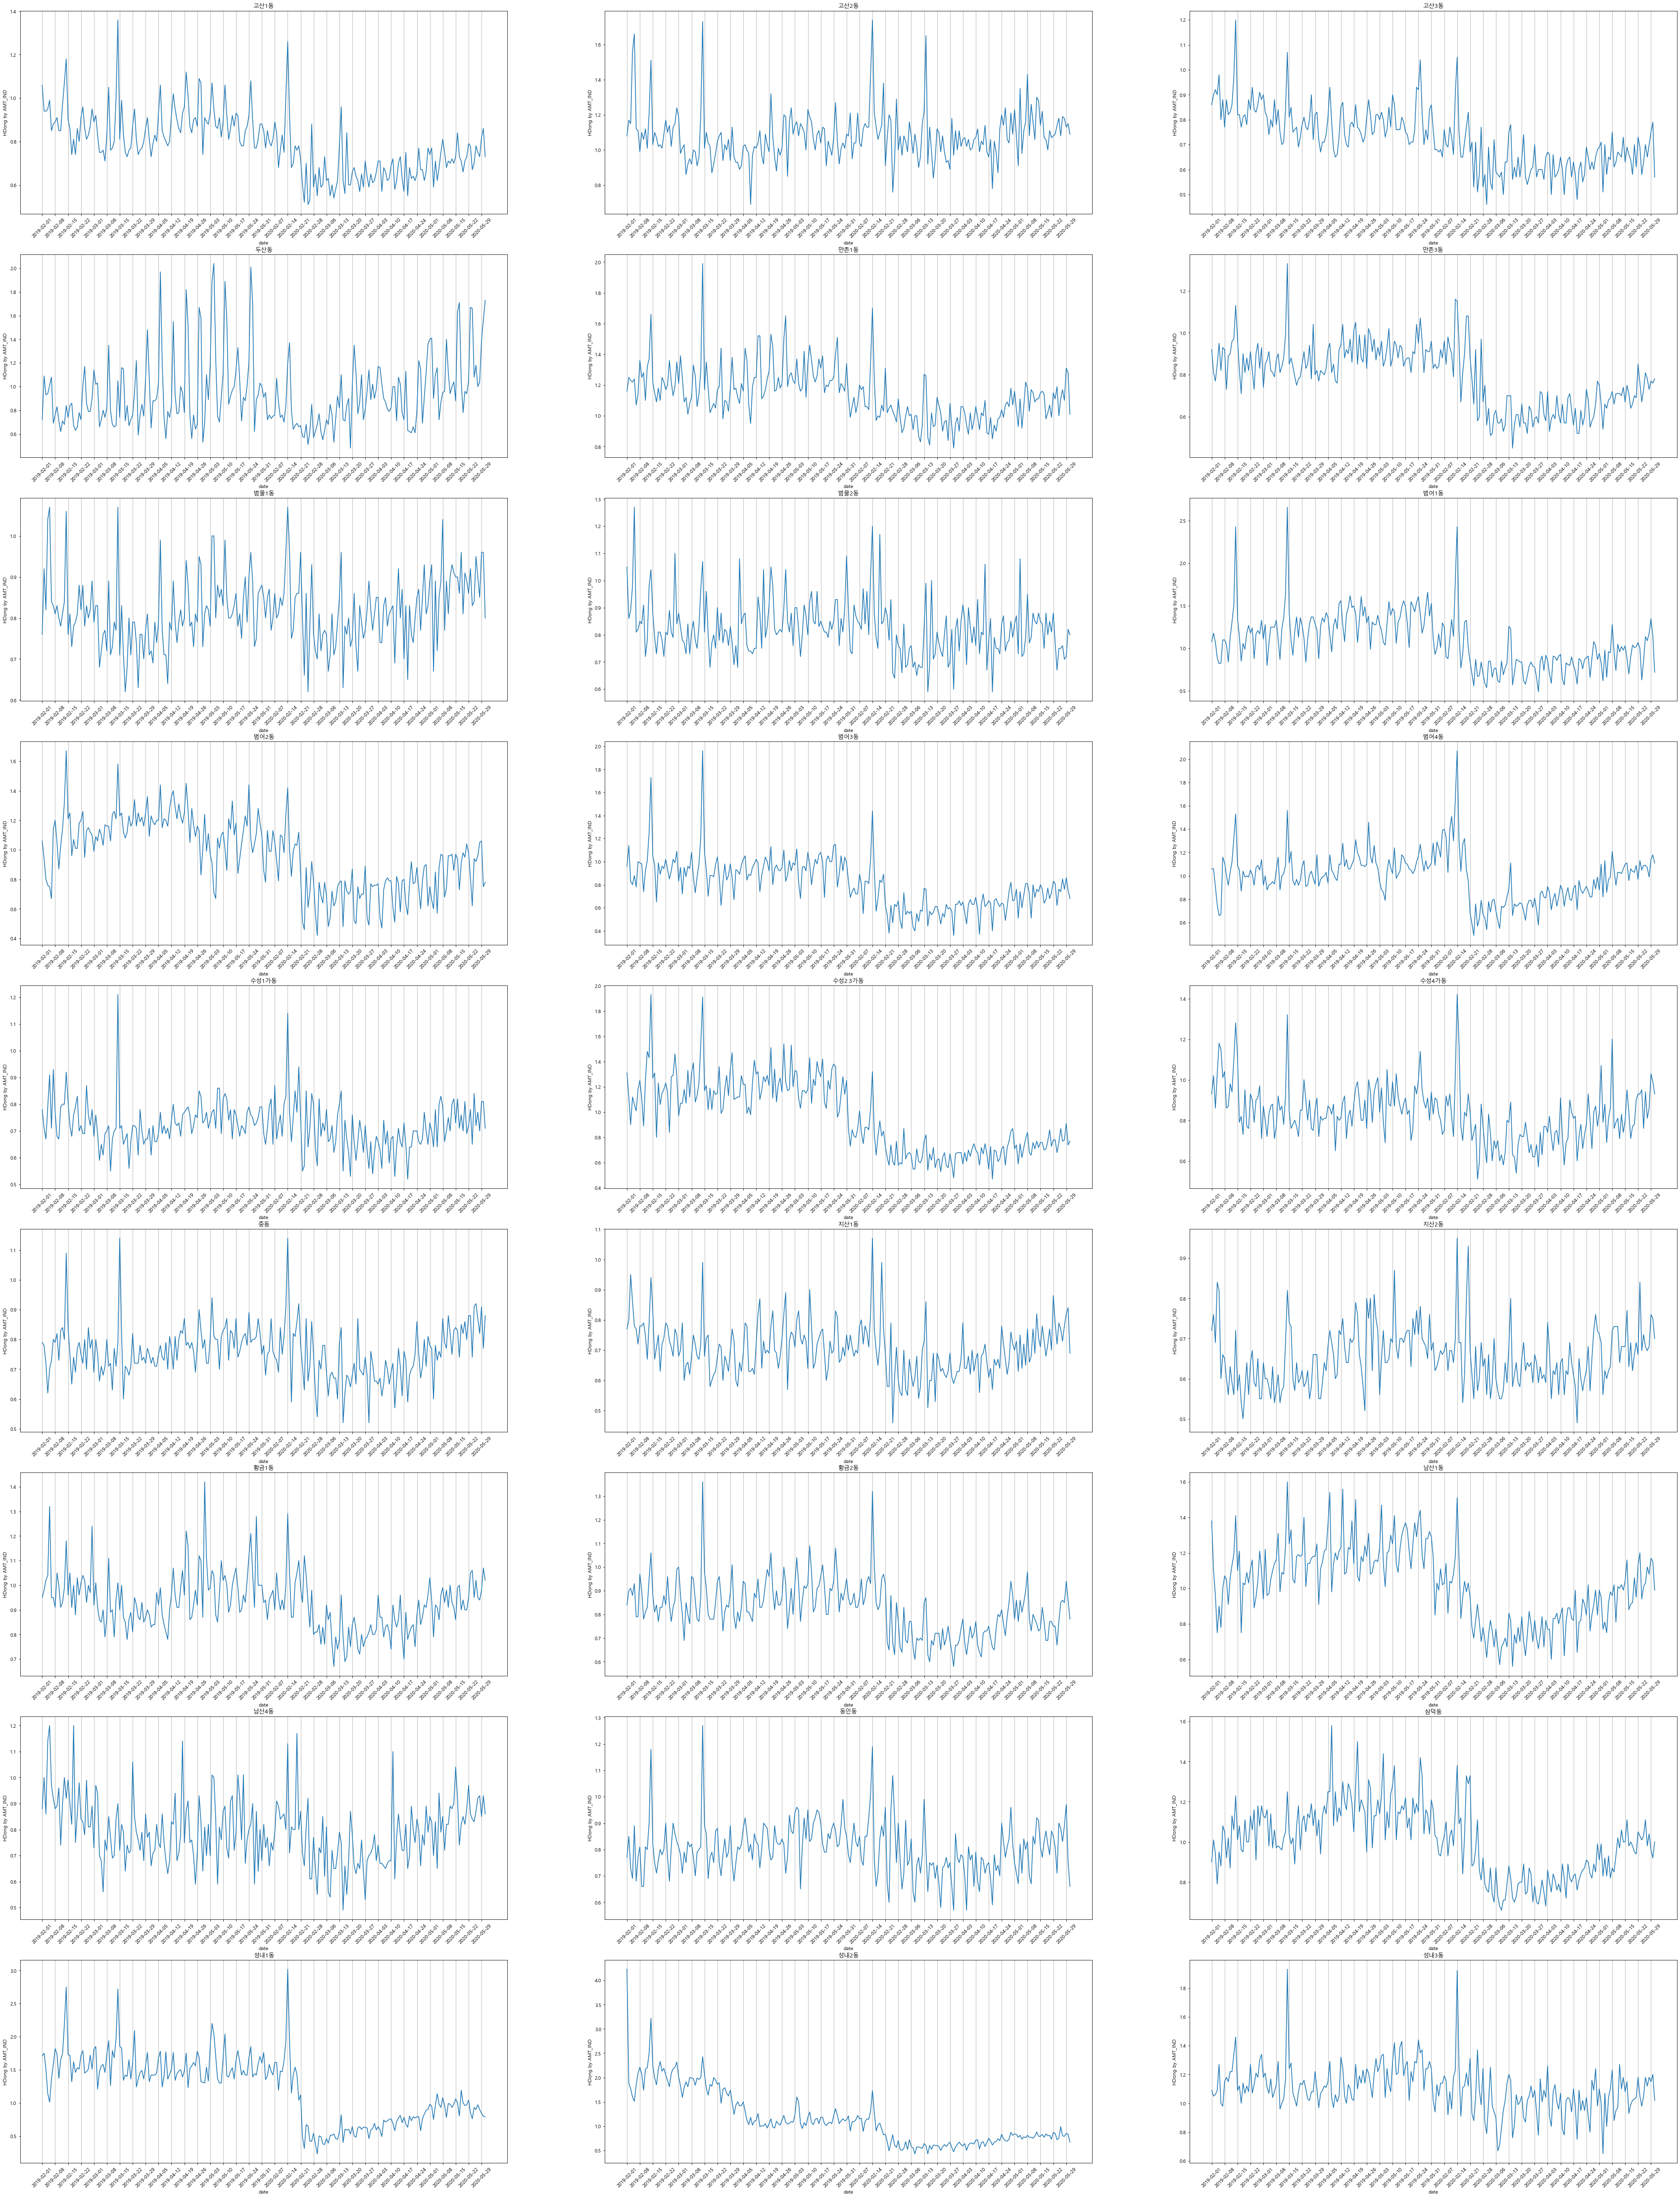

In [64]:
fig, axes = plt.subplots(ncols=3, nrows=9, figsize = (60, 80))
name_list = daegu_df['DONG_NM'].unique()

label = sorted(daegu_df['DATE'].unique())
index = np.arange(len(label))

for i, ax in zip(range(27),axes.flatten()):
    
    name = name_list[i]
    
    daegu_dong_amt_ind = daegu_df.query("DONG_NM == @name")['AMT_IND']
    daegu_amt_ind = pd.DataFrame({'date': label,
                             'amt_ind' : daegu_dong_amt_ind})

    daegu_amt = sns.lineplot(x='date',y='amt_ind', data=daegu_amt_ind, ax=ax)
    daegu_amt.set(ylabel="HDong by AMT_IND", title=name)
    daegu_amt.set_xticks(daegu_amt_ind['date'][::7])
    daegu_amt.set_xticklabels(labels = daegu_amt_ind['date'][::7], rotation='45')
    daegu_amt.grid(axis='x')
    
plt.show()    

### 서울

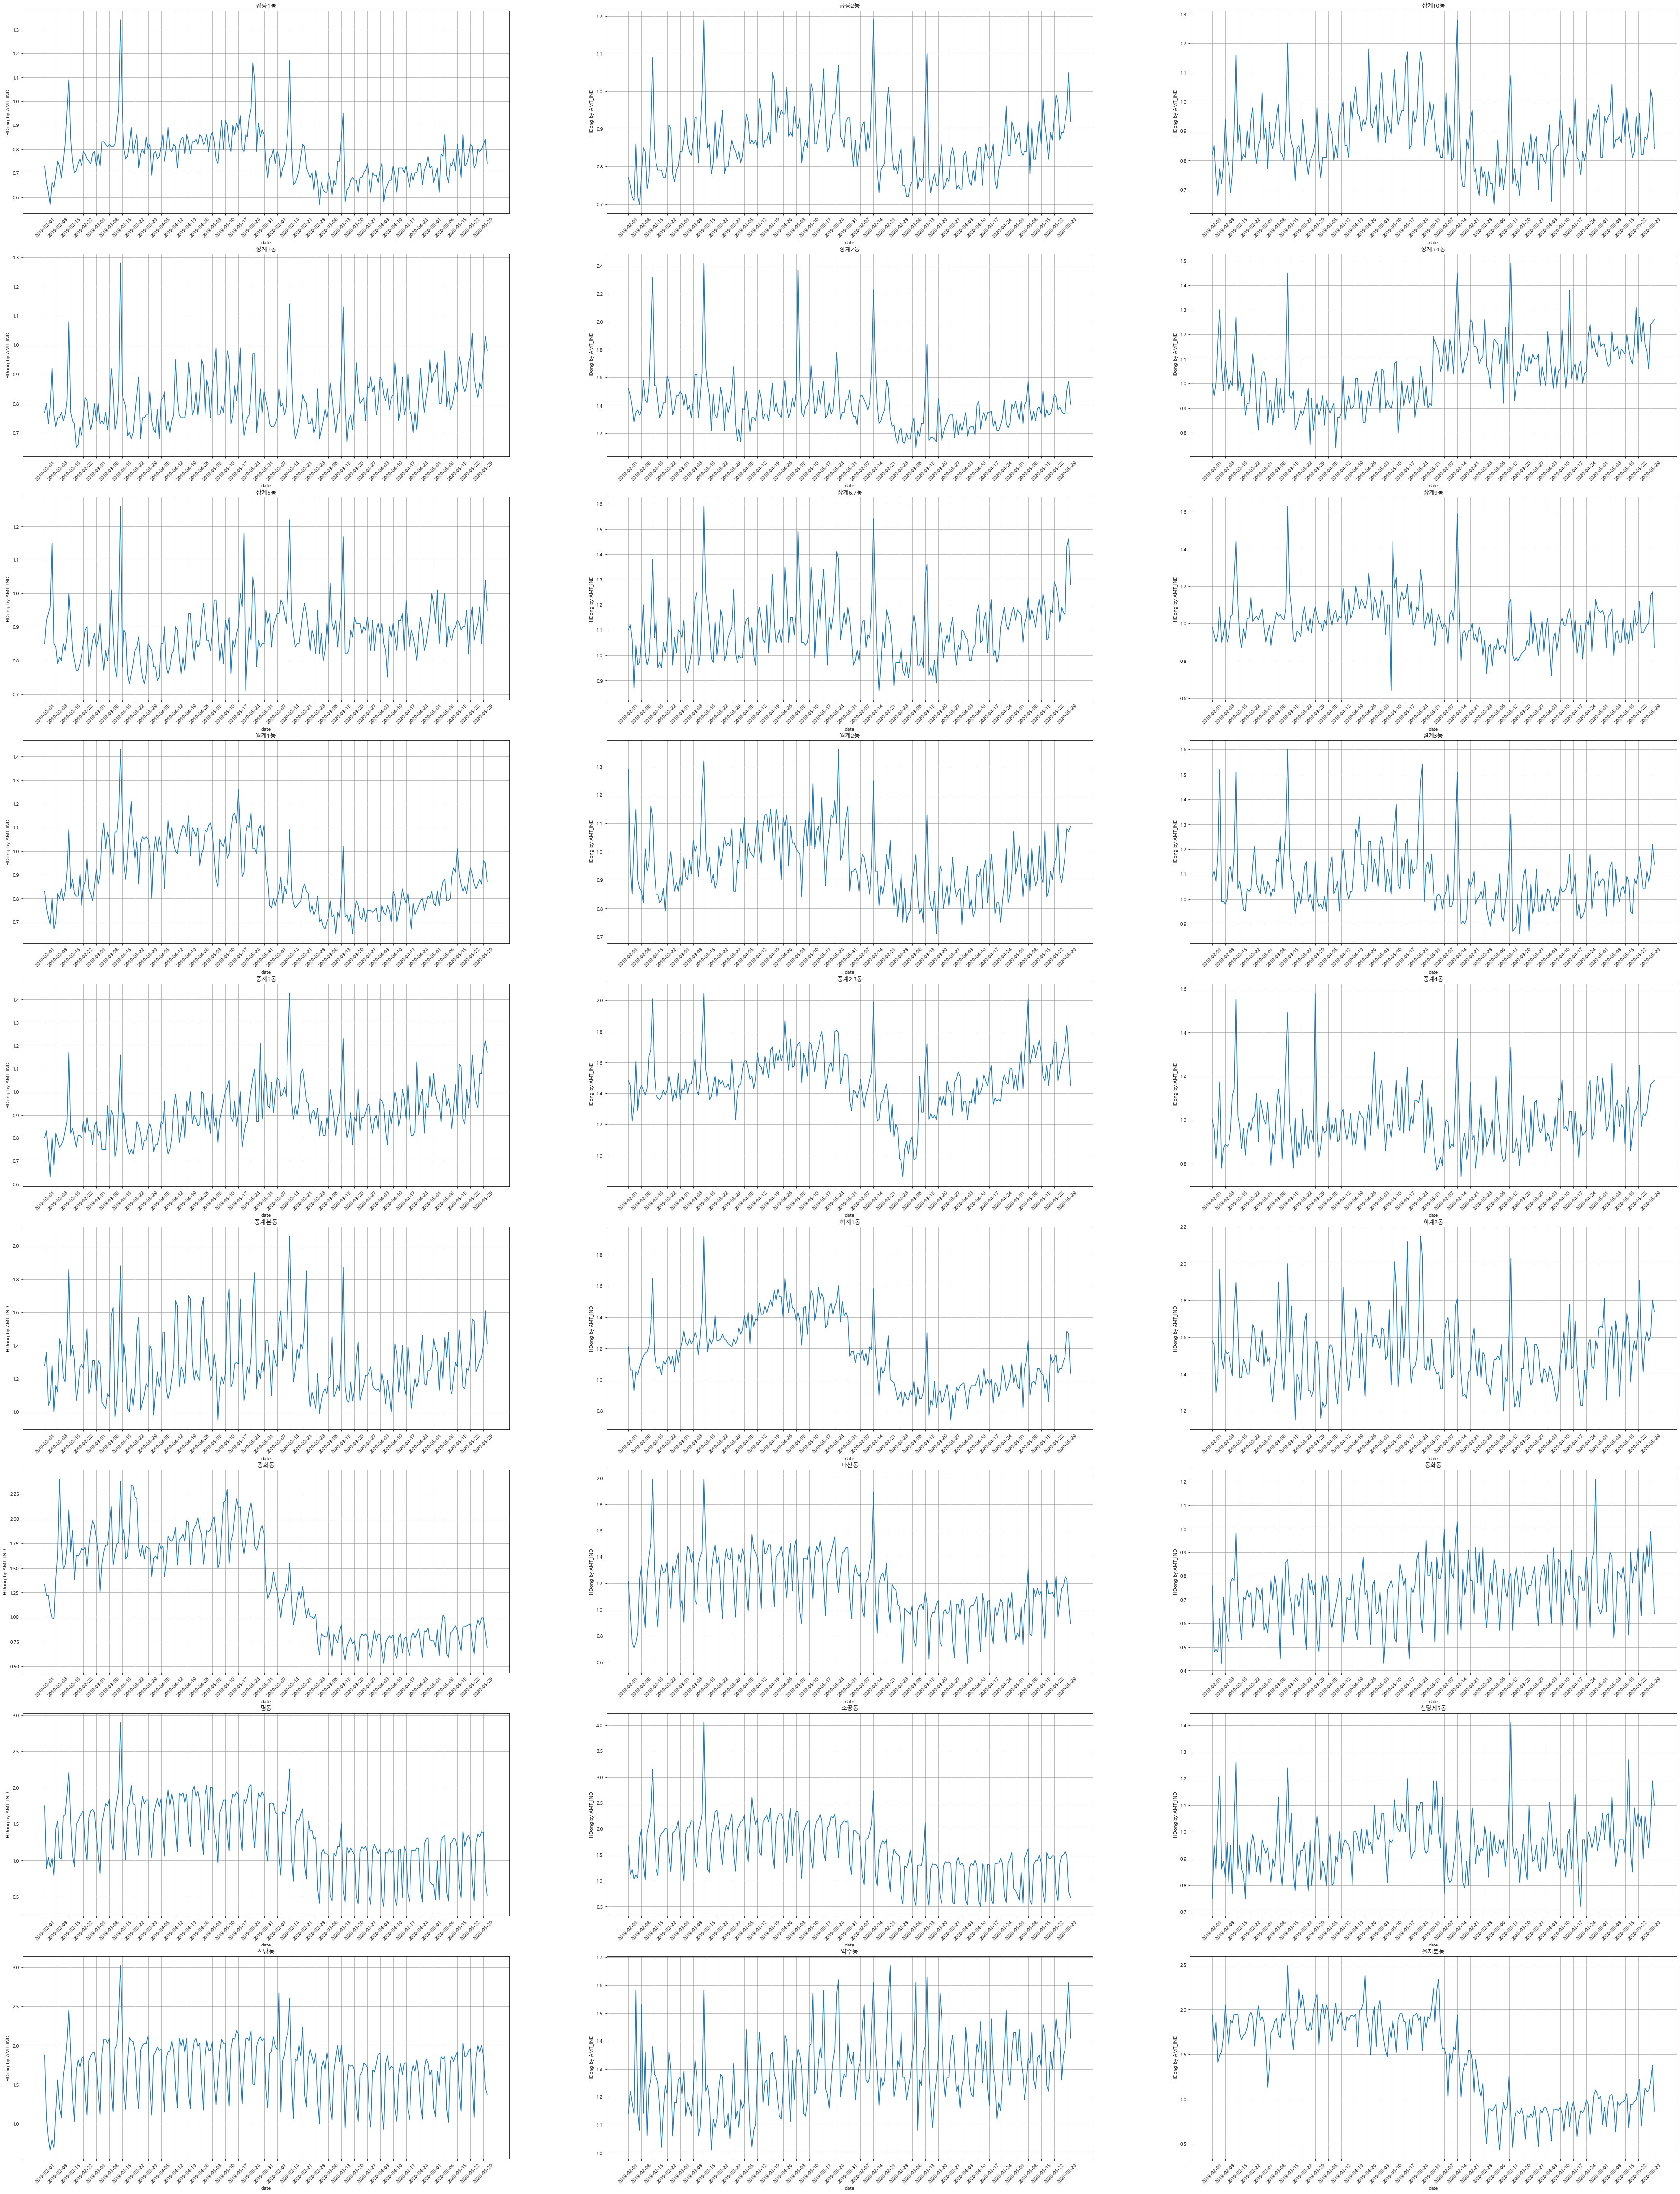

In [63]:
fig, axes = plt.subplots(ncols=3, nrows=9, figsize = (60, 80))
name_list = seoul_df['DONG_NM'].unique()

label = sorted(seoul_df['DATE'].unique())
index = np.arange(len(label))

for i, ax in zip(range(27),axes.flatten()):
    
    name = name_list[i]
    
    seoul_dong_amt_ind = seoul_df.query("DONG_NM == @name")['AMT_IND']
    seoul_amt_ind = pd.DataFrame({'date': label,
                             'amt_ind' : seoul_dong_amt_ind})

    seoul_amt = sns.lineplot(x='date',y='amt_ind', data=seoul_amt_ind, ax=ax)
    seoul_amt.set(ylabel="HDong by AMT_IND", title=name)
    seoul_amt.set_xticks(seoul_amt_ind['date'][::7])
    seoul_amt.set_xticklabels(labels = seoul_amt_ind['date'][::7], rotation='45')
    seoul_amt.grid(axis='x')
    
plt.show()    

### 업종별 매출 지수 그래프(by 년)
1. 업종 비중에 대한 합(1) 컬럼을 생성
2. 2. 매출지수(AMT_IND)와 상품비중(LCLS), 비중 합(SUM)을 곱한다.
3. 2019년, 2020년 df 따로 만들기
4. 파이그래프 그리기
    

In [171]:
gs_copy = gs.copy()
gs_copy.head()

DATE  YEAR  MONTH  DAY SI_NM GU_NM DONG_NM  AMT_IND     식사     간식  \
0 2019-02-01  2019      2    1    대구   수성구    고산1동     1.06  0.451  0.172   
1 2019-02-01  2019      2    1    대구   수성구    고산2동     1.08  0.458  0.196   
2 2019-02-01  2019      2    1    대구   수성구    고산3동     0.86  0.360  0.197   
3 2019-02-01  2019      2    1    대구   수성구     두산동     0.72  0.282  0.175   
4 2019-02-01  2019      2    1    대구   수성구    만촌1동     1.16  0.401  0.200   

    마실거리   홈&리빙  헬스&뷰티  취미&여가활동   사회활동  임신/육아 SI_CODE GU_CODE DONG_CODE  \
0  0.295  0.023  0.045    0.005  0.005  0.004      27      26       670   
1  0.296  0.006  0.034    0.001  0.009  0.001      27      26       680   
2  0.377  0.013  0.030    0.009  0.009  0.006      27      26       690   
3  0.363  0.024  0.134    0.000  0.021  0.000      27      26       640   
4  0.311  0.039  0.035    0.005  0.006  0.003      27      26       550   

  TOTAL_CODE  
0    2726670  
1    2726680  
2    2726690  
3    2726640  
4    2726550

In [197]:
# 0. 컬럼명 바꾸기
gs_copy.rename(columns = {"LCLS_10_P": "식사","LCLS_20_P": "간식", "LCLS_30_P": "마실거리","LCLS_40_P": "홈&리빙","LCLS_50_P": "헬스&뷰티","LCLS_60_P": "취미&여가활동","LCLS_70_P": "사회활동","LCLS_80_P": "임신/육아"}, inplace = True)

In [198]:
# 1. 업종 비중에 대한 합(1) 컬럼을 생성한다, 컬럼명 SUM
gs_copy['SUM'] = 1

In [199]:
# 2. 매출지수(AMT_IND)와 상품비중(LCLS), 비중 합(SUM)을 곱해준다.
gs_copy.iloc[:, [8,9,10,11,12,13,14,15,20]] = np.round(gs_copy.iloc[:, [8,9,10,11,12,13,14,15,20]].mul(gs_copy['AMT_IND'], axis=0),2)
gs_copy.head()

DATE  YEAR  MONTH  DAY SI_NM GU_NM DONG_NM  AMT_IND    식사    간식  ...  \
0 2019-02-01  2019      2    1    대구   수성구    고산1동     1.06  0.51  0.19  ...   
1 2019-02-01  2019      2    1    대구   수성구    고산2동     1.08  0.53  0.23  ...   
2 2019-02-01  2019      2    1    대구   수성구    고산3동     0.86  0.27  0.15  ...   
3 2019-02-01  2019      2    1    대구   수성구     두산동     0.72  0.14  0.09  ...   
4 2019-02-01  2019      2    1    대구   수성구    만촌1동     1.16  0.55  0.27  ...   

   홈&리빙  헬스&뷰티  취미&여가활동  사회활동  임신/육아  SI_CODE GU_CODE DONG_CODE TOTAL_CODE  \
0  0.02   0.05     0.01  0.01   0.00       27      26       670    2726670   
1  0.01   0.04     0.00  0.01   0.00       27      26       680    2726680   
2  0.01   0.03     0.01  0.01   0.01       27      26       690    2726690   
3  0.01   0.07     0.00  0.01   0.00       27      26       640    2726640   
4  0.06   0.05     0.01  0.01   0.00       27      26       550    2726550   

    SUM  
0  1.06  
1  1.08  
2  0.86  
3  0.72  
4  1.16  

[5 rows x 21 columns]

In [174]:
# 3. 2019년도 2020년도로 데이터 나누기
nine_df = gs_copy.loc[gs_copy['YEAR'] == 2019]
zero_df = gs_copy.loc[gs_copy['YEAR'] == 2020]

In [176]:
# 4. 상품비중(LCLS)와 비중 합(SUM)을 컬럼끼리 합친다.
sum_10 = nine_df['식사'].sum()
sum_20 = nine_df['간식'].sum()
sum_30 = nine_df['마실거리'].sum()
sum_40 = nine_df['홈&리빙'].sum()
sum_50 = nine_df['헬스&뷰티'].sum()
sum_60 = nine_df['취미&여가활동'].sum()
sum_70 = nine_df['사회활동'].sum()
sum_80 = nine_df['임신/육아'].sum()
total = nine_df['SUM'].sum()
nine_sum_df = pd.DataFrame({'식사' : sum_10,
              '간식' : sum_20, 
              '마실거리' : sum_30,  
              '홈&리빙' : sum_40, 
              '헬스&뷰티' : sum_50,
              '취미&여가활동' : sum_60, 
              '사회활동' : sum_70, 
              '임신/육아' : sum_80,
              'TOTAL_SUM' : total},
              index=[0])
nine_sum_df

식사       간식    마실거리    홈&리빙  헬스&뷰티  취미&여가활동   사회활동  임신/육아  TOTAL_SUM
0  2554.43  1762.48  2885.6  217.12  450.3     47.1  78.22  29.08     8035.3

In [180]:
sum_10 = zero_df['식사'].sum()
sum_20 = zero_df['간식'].sum()
sum_30 = zero_df['마실거리'].sum()
sum_40 = zero_df['홈&리빙'].sum()
sum_50 = zero_df['헬스&뷰티'].sum()
sum_60 = zero_df['취미&여가활동'].sum()
sum_70 = zero_df['사회활동'].sum()
sum_80 = zero_df['임신/육아'].sum()
total = zero_df['SUM'].sum()
zero_sum_df = pd.DataFrame({'식사' : sum_10,
              '간식' : sum_20, 
              '마실거리' : sum_30,  
              '홈&리빙' : sum_40, 
              '헬스&뷰티' : sum_50,
              '취미&여가활동' : sum_60, 
              '사회활동' : sum_70, 
              '임신/육아' : sum_80,
              'TOTAL_SUM' : total},
              index=[0])
zero_sum_df

식사       간식     마실거리    홈&리빙   헬스&뷰티  취미&여가활동   사회활동  임신/육아  TOTAL_SUM
0  2114.58  1581.64  2355.98  213.16  462.82    30.61  47.74  25.85    6847.56

In [191]:
# 5. TOTAl_SUM으로 LCLS를 나눈다.
nine_res = nine_sum_df.iloc[:,:8].div(nine_sum_df['TOTAL_SUM'], axis =0)
nine_res

식사        간식      마실거리      홈&리빙    헬스&뷰티   취미&여가활동      사회활동  \
0  0.317901  0.219342  0.359115  0.027021  0.05604  0.005862  0.009735   

      임신/육아  
0  0.003619

In [192]:
# 5. TOTAl_SUM으로 LCLS를 나눈다.
zero_res = zero_sum_df.iloc[:,:8].div(zero_sum_df['TOTAL_SUM'], axis =0)
zero_res

식사        간식      마실거리      홈&리빙     헬스&뷰티  취미&여가활동      사회활동  \
0  0.308808  0.230979  0.344061  0.031129  0.067589  0.00447  0.006972   

      임신/육아  
0  0.003775

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


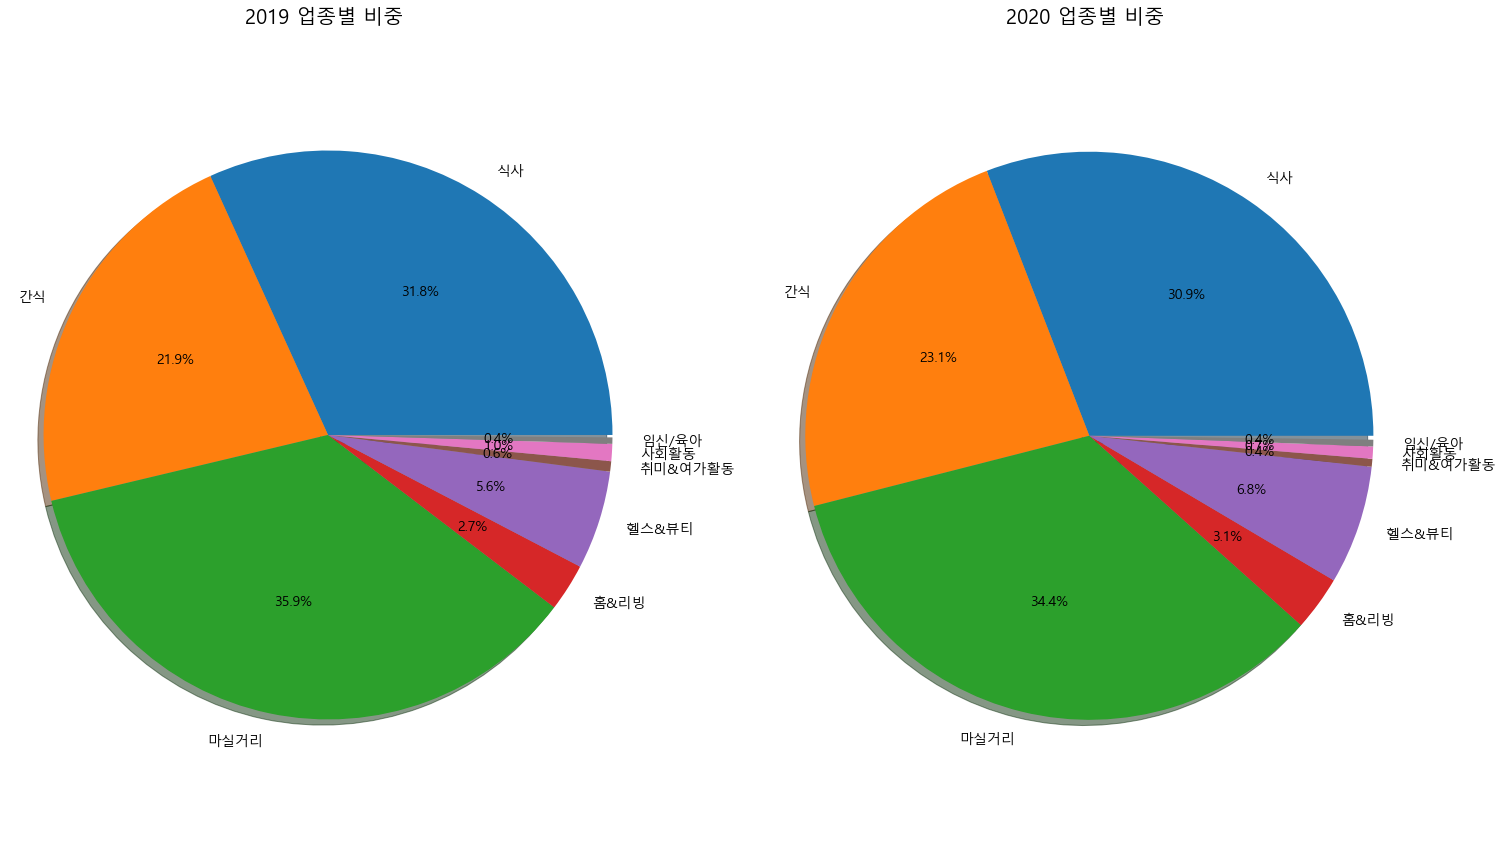

In [193]:
# 6. 파이 그래프 그리기
plt.figure(figsize=(25,15))

plt.subplot(1,2,1)
plt.pie([nine_res.loc[0]], labels=nine_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14})
plt.axis('equal') #  equal length of X and Y axis
plt.title('2019 업종별 비중', fontsize=20)

plt.subplot(1,2,2)
plt.pie([zero_res.loc[0]], labels=zero_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14})
plt.axis('equal') #  equal length of X and Y axis
plt.title('2020 업종별 비중', fontsize=20)
plt.show()

### 구별 상품매출비중(by 년)

In [200]:
gs_copy.head()

DATE  YEAR  MONTH  DAY SI_NM GU_NM DONG_NM  AMT_IND    식사    간식  ...  \
0 2019-02-01  2019      2    1    대구   수성구    고산1동     1.06  0.51  0.19  ...   
1 2019-02-01  2019      2    1    대구   수성구    고산2동     1.08  0.53  0.23  ...   
2 2019-02-01  2019      2    1    대구   수성구    고산3동     0.86  0.27  0.15  ...   
3 2019-02-01  2019      2    1    대구   수성구     두산동     0.72  0.14  0.09  ...   
4 2019-02-01  2019      2    1    대구   수성구    만촌1동     1.16  0.55  0.27  ...   

   홈&리빙  헬스&뷰티  취미&여가활동  사회활동  임신/육아  SI_CODE GU_CODE DONG_CODE TOTAL_CODE  \
0  0.02   0.05     0.01  0.01   0.00       27      26       670    2726670   
1  0.01   0.04     0.00  0.01   0.00       27      26       680    2726680   
2  0.01   0.03     0.01  0.01   0.01       27      26       690    2726690   
3  0.01   0.07     0.00  0.01   0.00       27      26       640    2726640   
4  0.06   0.05     0.01  0.01   0.00       27      26       550    2726550   

    SUM  
0  1.06  
1  1.08  
2  0.86  
3  0.72  
4  1.16  

[5 rows x 21 columns]

In [205]:
# 1. 구별 데이터 프레임 나누기
daegu_suseonggu_nine_df = gs_copy.query("(GU_NM == '수성구') and (SI_NM == '대구') and (YEAR == 2019)")
daegu_suseonggu_zero_df = gs_copy.query("(GU_NM == '수성구') and (SI_NM == '대구') and (YEAR == 2020)")
daegu_junggu_nine_df = gs_copy.query("(GU_NM == '중구') and (SI_NM == '대구') and (YEAR == 2019)")
daegu_junggu_zero_df = gs_copy.query("(GU_NM == '중구') and (SI_NM == '대구') and (YEAR == 2020)")
seoul_nowongu_nine_df = gs_copy.query("(GU_NM == '노원구') and (SI_NM == '서울') and (YEAR == 2019)")
seoul_nowongu_zero_df = gs_copy.query("(GU_NM == '노원구') and (SI_NM == '서울') and (YEAR == 2020)")
seoul_junggu_nine_df = gs_copy.query("(GU_NM == '중구') and (SI_NM == '서울') and (YEAR == 2019)")
seoul_junggu_zero_df = gs_copy.query("(GU_NM == '중구') and (SI_NM == '서울') and (YEAR == 2020)")

In [208]:
# 2. 상품비중(LCLS)와 비중 합(SUM)을 컬럼끼리 합치고 나눈다.
def sum_percent(df):
    sum_10 = df['식사'].sum()
    sum_20 = df['간식'].sum()
    sum_30 = df['마실거리'].sum()
    sum_40 = df['홈&리빙'].sum()
    sum_50 = df['헬스&뷰티'].sum()
    sum_60 = df['취미&여가활동'].sum()
    sum_70 = df['사회활동'].sum()
    sum_80 = df['임신/육아'].sum()
    total = df['SUM'].sum()
    sum_df = pd.DataFrame({'식사' : sum_10,
                  '간식' : sum_20, 
                  '마실거리' : sum_30,  
                  '홈&리빙' : sum_40, 
                  '헬스&뷰티' : sum_50,
                  '취미&여가활동' : sum_60, 
                  '사회활동' : sum_70, 
                  '임신/육아' : sum_80,
                  'TOTAL_SUM' : total},
                  index=[0])
    
    sum_div_res = sum_df.iloc[:,:8].div(sum_df['TOTAL_SUM'], axis =0)

    return sum_div_res

daegu_suseonggu_nine_res = sum_percent(daegu_suseonggu_nine_df)
daegu_suseonggu_zero_res = sum_percent(daegu_suseonggu_zero_df)

daegu_junggu_nine_res = sum_percent(daegu_junggu_nine_df)
daegu_junggu_zero_res =sum_percent(daegu_junggu_zero_df)

seoul_nowongu_nine_res = sum_percent(seoul_nowongu_nine_df)
seoul_nowongu_zero_res = sum_percent(seoul_nowongu_zero_df)

seoul_junggu_nine_res = sum_percent(seoul_junggu_nine_df)
seoul_jung_zero_res = sum_percent(seoul_junggu_zero_df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Progr

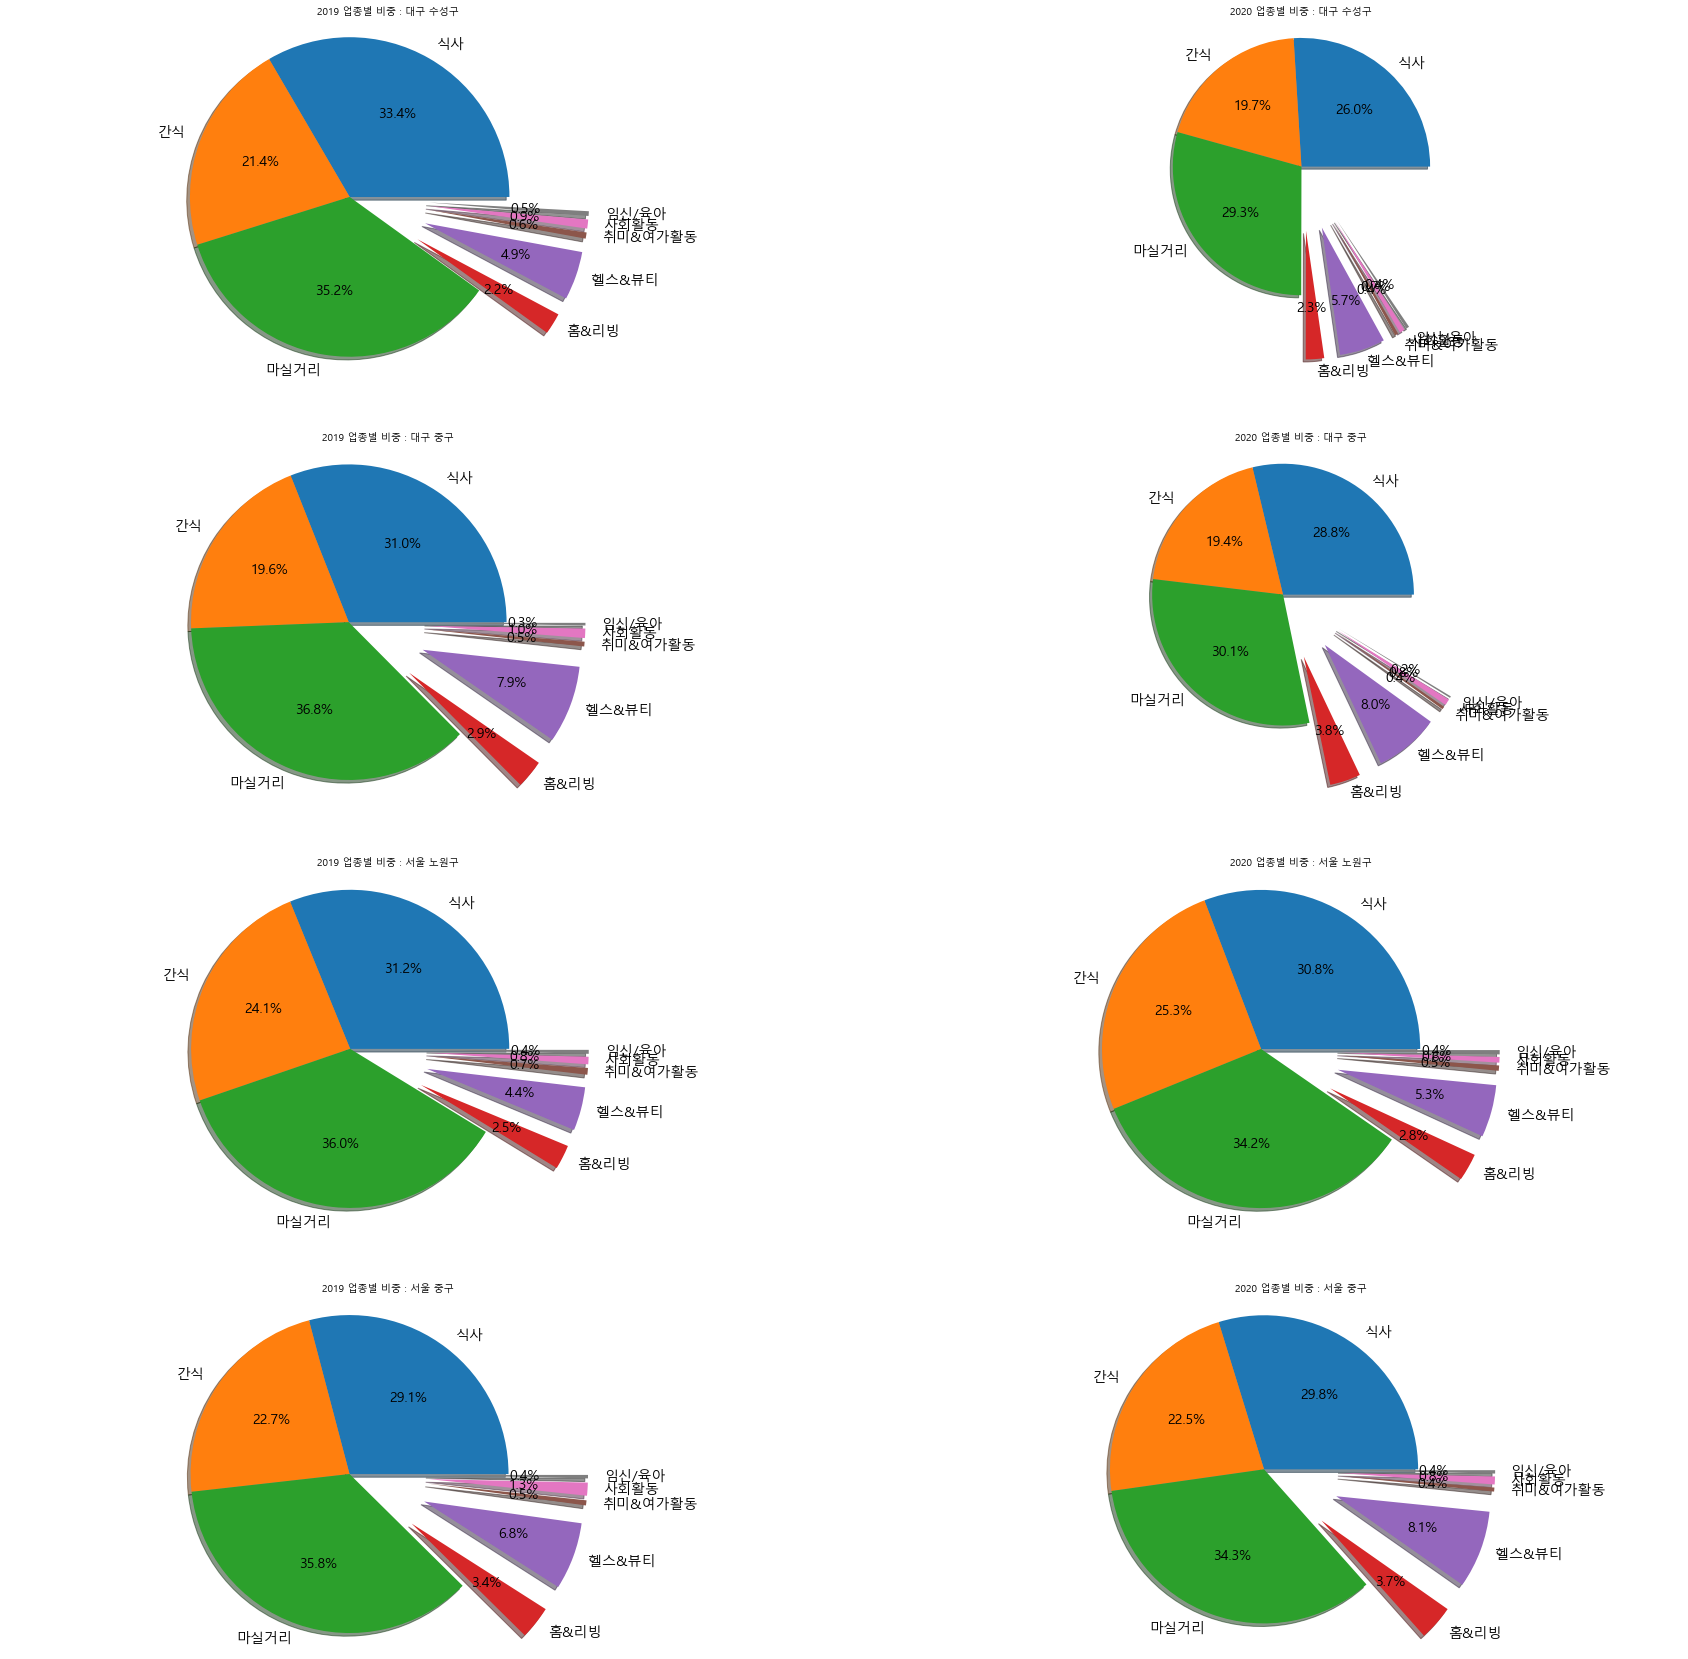

In [228]:
# 3. 파이 그래프 그리기 (for문으로 바꾸기)
plt.figure(figsize=(30,30))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

# 대구 수성구
plt.subplot(4,2,1)
plt.pie([daegu_suseonggu_nine_res.loc[0]], labels=daegu_suseonggu_nine_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14}, explode=(0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5))
plt.axis('equal') #  equal length of X and Y axis
plt.title('2019 업종별 비중 : 대구 수성구', fontsize=10)

plt.subplot(4,2,2)
plt.pie([daegu_suseonggu_zero_res.loc[0]], labels=daegu_suseonggu_zero_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14}, explode=(0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5))
plt.axis('equal') #  equal length of X and Y axis
plt.title('2020 업종별 비중 : 대구 수성구', fontsize=10)
# 대구 중구
plt.subplot(4,2,3)
plt.pie([daegu_junggu_nine_res.loc[0]], labels=daegu_junggu_nine_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14}, explode=(0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5))
plt.axis('equal') #  equal length of X and Y axis
plt.title('2019 업종별 비중 : 대구 중구', fontsize=10)

plt.subplot(4,2,4)
plt.pie([daegu_junggu_zero_res.loc[0]], labels=daegu_junggu_zero_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14}, explode=(0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5))
plt.axis('equal') #  equal length of X and Y axis
plt.title('2020 업종별 비중 : 대구 중구', fontsize=10)
#서울 노원구
plt.subplot(4,2,5)
plt.pie([seoul_nowongu_nine_res.loc[0]], labels=seoul_nowongu_nine_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14}, explode=(0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5))
plt.axis('equal') #  equal length of X and Y axis
plt.title('2019 업종별 비중 : 서울 노원구', fontsize=10)

plt.subplot(4,2,6)
plt.pie([seoul_nowongu_zero_res.loc[0]], labels=seoul_nowongu_zero_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14}, explode=(0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5))
plt.axis('equal') #  equal length of X and Y axis
plt.title('2020 업종별 비중 : 서울 노원구', fontsize=10)
# 서울 중구
plt.subplot(4,2,7)
plt.pie([seoul_junggu_nine_res.loc[0]], labels=seoul_junggu_nine_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14}, explode=(0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5))
plt.axis('equal') #  equal length of X and Y axis
plt.title('2019 업종별 비중 : 서울 중구', fontsize=10)

plt.subplot(4,2,8)
plt.pie([seoul_jung_zero_res.loc[0]], labels=seoul_jung_zero_res.columns, autopct='%0.1f%%', shadow=True, textprops={'fontsize': 14}, explode=(0, 0, 0, 0.5, 0.5, 0.5, 0.5, 0.5))
plt.axis('equal') #  equal length of X and Y axis
plt.title('2020 업종별 비중 : 서울 중구', fontsize=10)

plt.show()

# CJ Data

In [66]:
cj.head()

In [67]:
cj_copy = cj.copy()
cj_copy.head()

DATE  YEAR  MONTH  DAY ITEM_CODE SI_CODE SI_NM GU_CODE GU_NM  \
0 2019-02-01  2019      2    1        12      11    서울      14    중구   
1 2019-02-01  2019      2    1        10      11    서울      14    중구   
2 2019-02-01  2019      2    1        10      27    대구      11    중구   
3 2019-02-01  2019      2    1        12      27    대구      11    중구   
4 2019-02-01  2019      2    1        13      27    대구      26   수성구   

  DONG_CODE DONG_NM  TRANSIT_COUNT TOTAL_CODE  
0       665     동화동           16.0    1114665  
1       615     신당동            4.0    1114615  
2       565    성내1동            1.0    2711565  
3       650    남산2동            6.0    2711650  
4       690    고산3동           21.0    2726690

### 시별(서울/대구) 월별 배송상품건수 그래프
* x축 = [2019년 2월, 2019년 3월, 2019년 4월, 2019년 5월, 2020년 2월, 2020년 3월, 2020년 4월, 2020년 5월]
* y축 = TRANSIT_COUNT
* 총 10개의 선이 있음 - 배송상품분류
    1. 서울 dataframe, 대구 dataframe 나누기
    2. 년, 월, ITEM_CODE으로 그룹 짓기
    3. 그래프 그리기
        1. query문을 사용해서 각 코드별로 시계열 순서대로 배송건수 누적하기
        

In [86]:
# 년+월 컬럼 만들기
cj_copy['YYMM'] = cj_copy['YEAR'].astype(str)+'0'+cj_copy['MONTH'].astype(str)

# 1. 서울 DataFrame로, 대구 DataFrame로 나누기
daegu_df = cj_copy[cj_copy['TOTAL_CODE'].str.startswith('27')]
seoul_df = cj_copy[cj_copy['TOTAL_CODE'].str.startswith('11')]

# total_code 딕셔너리를 DataFrame로 변환
item_df = pd.DataFrame(cj_data['ITEM_CODE_DICT'].items(), columns=['ITEM_CODE', 'ITEM_NM'])
# item_df.head()

# 대구 DataFrame와 item_df DataFrame 병합
daegu_df = pd.merge(daegu_df, item_df, on="ITEM_CODE")
# daegu_df.head()

# 서울 DataFrame와 item_df DataFrame 병합
seoul_df = pd.merge(seoul_df, item_df, on="ITEM_CODE")
# seoul_df.head()

###  대구 그래프

     date  가구/인테리어     도서/음반   디지털/가전      생활건강   스포츠/레저        식품     출산/육아  \
0  201902  24351.0   55049.0  52580.0  131491.0  49032.0  124657.0  120694.0   
1  201903  28198.0   67313.0  56255.0  154425.0  58146.0  141875.0  166071.0   
2  201904  28274.0   55259.0  53704.0  169838.0  62774.0  137960.0  177429.0   
3  201905  27852.0   50788.0  56040.0  172118.0  65606.0  140645.0  189014.0   
4  202002  27802.0   73624.0  63491.0  281815.0  52838.0  229587.0  143911.0   
5  202003  36498.0  106150.0  79546.0  335618.0  64098.0  242453.0  180700.0   
6  202004  38722.0   83106.0  74839.0  257701.0  64968.0  190534.0  191233.0   
7  202005  40574.0   72622.0  78784.0  248974.0  78646.0  208309.0  233135.0   

      패션의류      패션잡화  화장품/미용  
0   7800.0   94549.0  3949.0  
1   8600.0  100539.0  4157.0  
2   9436.0  105223.0  4468.0  
3   9593.0  104565.0  4623.0  
4   8299.0  120635.0  4976.0  
5  11183.0  125208.0  4750.0  
6  12275.0  110884.0  4898.0  
7  14187.0  115774.0  5219.0  


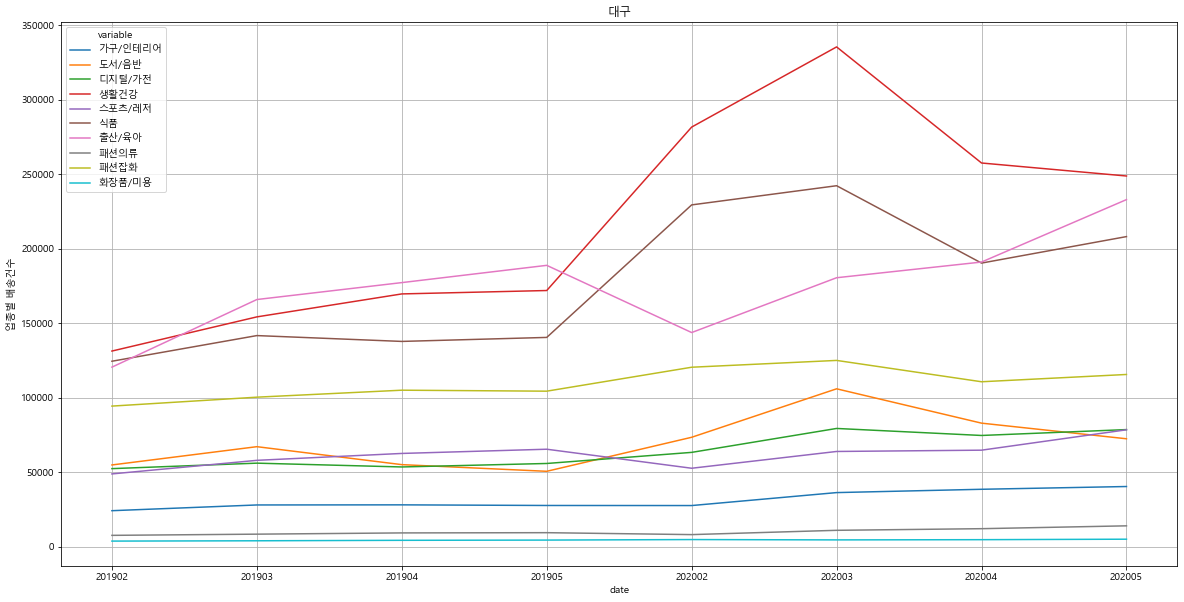

In [82]:
itemcode_list = daegu_df['ITEM_NM'].unique()

label = sorted(daegu_df['YYMM'].unique())
index = np.arange(len(label))

daegu_transit = []

for i in range(10):
    daegu_temp =[]
    code = itemcode_list[i]
    
    for ddd in label:
        daegu_temp.append(daegu_df.query("(YYMM == @ddd) and (ITEM_NM == @code)")['TRANSIT_COUNT'].sum())
    daegu_transit.append(daegu_temp)

daegu_transit_df = pd.DataFrame({'date': label,
                              '가구/인테리어' : daegu_transit[0],
                             '도서/음반' : daegu_transit[1],
                             '디지털/가전' : daegu_transit[2],
                             '생활건강' : daegu_transit[3],
                             '스포츠/레저' : daegu_transit[4],
                             '식품' : daegu_transit[5],
                             '출산/육아' : daegu_transit[6],
                             '패션의류' : daegu_transit[7],
                             '패션잡화' : daegu_transit[8],
                             '화장품/미용' : daegu_transit[9]})
print(daegu_transit_df)

plt.figure(figsize = (20, 10))
daegu_line = sns.lineplot(x='date', y='value', hue='variable',data=pd.melt(daegu_transit_df, ['date']))
daegu_line.set(ylabel="업종별 배송건수", title='대구')    
daegu_line.grid()
plt.show()    

### 서울 그래프

     date   가구/인테리어    도서/음반    디지털/가전     생활건강    스포츠/레저        식품     출산/육아  \
0  201902   61865.0  34149.0   83393.0  11067.0   74590.0  209084.0  174190.0   
1  201903   84197.0  42706.0   97588.0  12564.0   91606.0  250647.0  213747.0   
2  201904   67287.0  42832.0   93159.0  13436.0   99346.0  266331.0  198514.0   
3  201905   61964.0  40969.0   92994.0  14643.0  101835.0  271778.0  202782.0   
4  202002   84216.0  41108.0  101427.0  11476.0   83016.0  343877.0  294179.0   
5  202003  105186.0  50732.0  118609.0  14888.0   95919.0  416201.0  337433.0   
6  202004   93498.0  56565.0  112052.0  16084.0   96401.0  344100.0  258885.0   
7  202005   80155.0  59026.0  121437.0  17844.0  115496.0  356023.0  274782.0   

       패션의류    패션잡화    화장품/미용  
0  182863.0  5518.0  126276.0  
1  254575.0  6152.0  137949.0  
2  273500.0  6474.0  145036.0  
3  287038.0  6920.0  147147.0  
4  222766.0  6415.0  153458.0  
5  266347.0  6658.0  166072.0  
6  277167.0  6422.0  148253.0  
7  325701.0  7

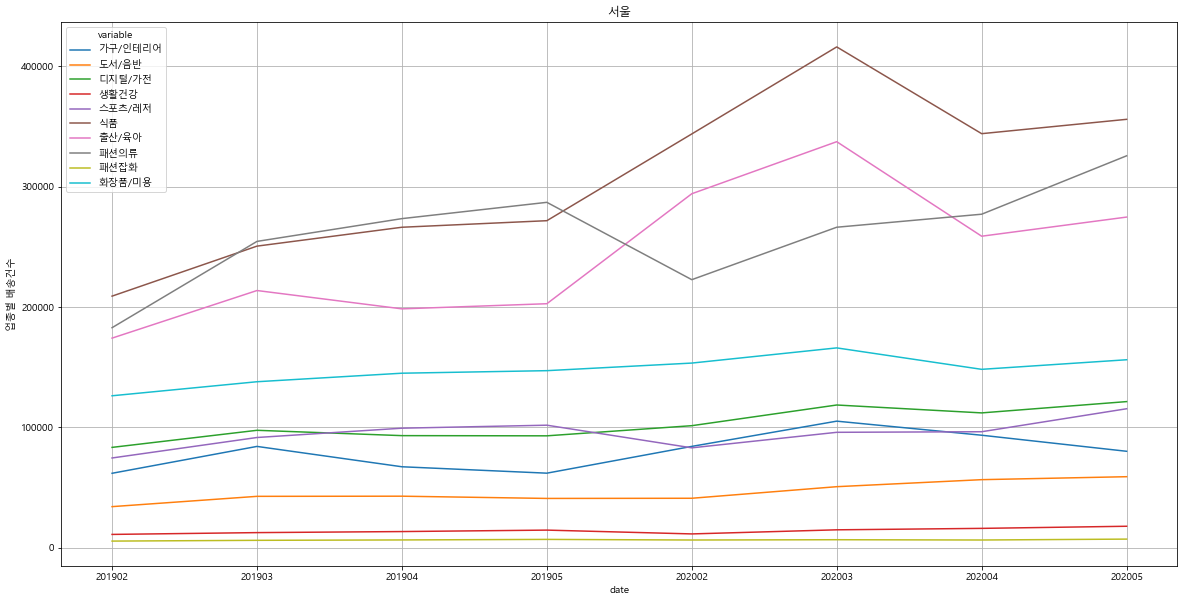

In [85]:
itemcode_list = seoul_df['ITEM_NM'].unique()

label = sorted(seoul_df['YYMM'].unique())
index = np.arange(len(label))

seoul_transit = []

for i in range(10):
    seoul_temp =[]
    code = itemcode_list[i]
    
    for ddd in label:
        seoul_temp.append(seoul_df.query("(YYMM == @ddd) and (ITEM_NM == @code)")['TRANSIT_COUNT'].sum())
    seoul_transit.append(seoul_temp)

seoul_transit_df = pd.DataFrame({'date': label,
                              '가구/인테리어' : seoul_transit[0],
                             '도서/음반' : seoul_transit[1],
                             '디지털/가전' : seoul_transit[2],
                             '생활건강' : seoul_transit[3],
                             '스포츠/레저' : seoul_transit[4],
                             '식품' : seoul_transit[5],
                             '출산/육아' : seoul_transit[6],
                             '패션의류' : seoul_transit[7],
                             '패션잡화' : seoul_transit[8],
                             '화장품/미용' : seoul_transit[9]})
print(seoul_transit_df)

plt.figure(figsize = (20, 10))
seoul_line = sns.lineplot(x='date', y='value', hue='variable',data=pd.melt(seoul_transit_df, ['date']))
seoul_line.set(ylabel="업종별 배송건수", title='서울')    
seoul_line.grid()
plt.show()    